## Check/install TensorFlow version
**Must be version 2.1.0**


In [7]:
# Switch the TensorFlow version 2.1
!pip install tensorflow==2.10

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 48.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 60.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 36.7 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2

## Import libraries and create noisy data



In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from google.colab import files
import tensorflow as tf
import math

# Parameters
duration = 20  # seconds
sampling_rate = 1e-4  # 0.1 ms
n_points = int(duration / sampling_rate)
noise_range = 1  # nanometers
time_constant = 1  # time constant for the damping
frequency = 1  # Hz
time = np.arange(0, duration, sampling_rate)

# Generate noisy signal
signal = 1 + noise_range * (np.random.rand(n_points) - 0.5)  # Centered around 1 nm with noise

# Define the jump
jump_time = duration / 2  # Jump in the middle of the signal
jump_index = int(jump_time / sampling_rate)
transition_duration = 0.5  # Duration of the transition in seconds
transition_points = int(transition_duration / sampling_rate)
transition = np.linspace(1, 10, transition_points)

# Apply the transition to the signal
signal[:jump_index] = 1 + noise_range * (np.random.rand(jump_index) - 0.5)
signal[jump_index:jump_index + transition_points] = transition + noise_range * (np.random.rand(transition_points) - 0.5)

# Generate the damped oscillation after the transition
damped_oscillation = np.exp(-(time[jump_index + transition_points:] - jump_time - transition_duration) / time_constant) * \
                     np.cos(2 * np.pi * frequency * (time[jump_index + transition_points:] - jump_time - transition_duration))

# Add the damped oscillation to the signal after the transition
signal[jump_index + transition_points:] = 10 + noise_range * (np.random.rand(n_points - jump_index - transition_points) - 0.5) + damped_oscillation


# Provide data as x_data and y_data
x_data = time
y_data = signal

## Display curve to fit

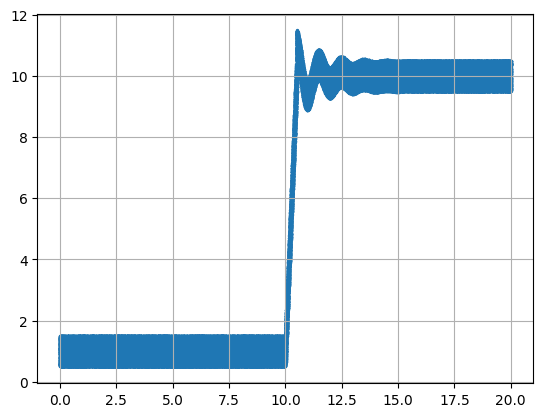

In [54]:
# Display the dataset
plt.scatter(x_data[::1], y_data[::1], s=2)
plt.grid()
plt.show()

# Create the model
Create the model with two 64 units hidden layers.

In [55]:
# Define the model
model = keras.Sequential()
model.add(keras.layers.Dense(units=1, activation='linear', input_shape=[1]))
model.add(keras.layers.Dense(units=64, activation='tanh'))
model.add(keras.layers.Dense(units=64, activation='tanh'))
model.add(keras.layers.Dense(units=64, activation='tanh'))
model.add(keras.layers.Dense(units=64, activation='tanh'))
model.add(keras.layers.Dense(units=1, activation='linear'))

# Compile the model
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_74 (Dense)            (None, 1)                 2         
                                                                 
 dense_75 (Dense)            (None, 64)                128       
                                                                 
 dense_76 (Dense)            (None, 64)                4160      
                                                                 
 dense_77 (Dense)            (None, 64)                4160      
                                                                 
 dense_78 (Dense)            (None, 64)                4160      
                                                                 
 dense_79 (Dense)            (None, 1)                 65        
                                                                 
Total params: 12,675
Trainable params: 12,675
Non-tra

## Understand and fit over 100 epochs

In [56]:
# Training
model.fit(x_data, y_data, epochs=200, batch_size=32, verbose=1)

Epoch 1/200
6250/6250 [==============================] - 18s 3ms/step - loss: 0.6281
Epoch 2/200
6250/6250 [==============================] - 16s 3ms/step - loss: 0.2712
Epoch 3/200
6250/6250 [==============================] - 16s 3ms/step - loss: 0.2918
Epoch 4/200
6250/6250 [==============================] - 15s 2ms/step - loss: 0.2050
Epoch 5/200
6250/6250 [==============================] - 16s 3ms/step - loss: 0.2193
Epoch 6/200
6250/6250 [==============================] - 17s 3ms/step - loss: 0.1885
Epoch 7/200
6250/6250 [==============================] - 17s 3ms/step - loss: 0.2006
Epoch 8/200
6250/6250 [==============================] - 15s 2ms/step - loss: 0.1693
Epoch 9/200
6250/6250 [==============================] - 15s 2ms/step - loss: 0.1973
Epoch 10/200
6250/6250 [==============================] - 16s 3ms/step - loss: 0.1523
Epoch 11/200
6250/6250 [==============================] - 16s 3ms/step - loss: 0.1502
Epoch 12/200
6250/6250 [==============================] - 17s 3

# Predict and display

6250/6250 [==============================] - 10s 2ms/step


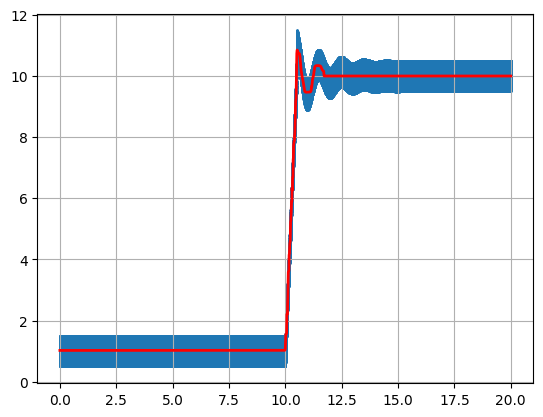

In [57]:
# Compute the output
y_predicted = model.predict(x_data)

# Display the result
plt.scatter(x_data[::1], y_data[::1], s=1)
plt.plot(x_data, y_predicted, 'r', linewidth=2)
plt.grid()